# Spam/ham classification

In this assignment you will train a classifier to recognise spam emails. The data was taken from this [enron spam](https://www.kaggle.com/wanderfj/enron-spam)  kaggle dataset. The dataset is described [here](https://www.researchgate.net/publication/221650814_Spam_Filtering_with_Naive_Bayes_-_Which_Naive_Bayes). This will familiarize you with tools  for text analysis  from  the scikit-learn library. 

The data is provided as a zip archive "enron_spam.zip". You can unpack it with command `unzip enron_spam.zip` which will create a directory `data`. 

The data  consists of 6 batches of emails. Each batch corresponds to different person and different spam source. Each batch is stored in different subdirectory of `data` named `Enron_1` to `Enron_6`. Each email is stored in separate file :( Spam and ham emails are stored in different subdirectories. Fortunatelly the scikit-learn library provides a functiona `load_files` that can read data in this format. 

# ALL LIBRARIES NEEDED

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
print("DONE")

DONE


You can load data from given batch using the function

In [3]:
data1 = load_files('enron_spam/data/Enron_1/', encoding='latin-1', shuffle=True, categories=['ham', 'spam'] )
print("DONE")

DONE


It returns a python dictionary. The entry 'data' contains the data from files and the entry 'target' contains the labels assigned according to the subdirectory names. The labels are integers and corresponding names can be found in the entry 'target_names'.

In [4]:
len(data1['data'])

4137

In [5]:
data1['data'][:2]

["Subject: re : cornhusker deal\r\nrita ,\r\nthings have been changing daily on this thing , so we were waiting to get it\r\nall figured out .\r\ni did tell mark mccoy to handle this , and he is going to get you all the\r\ninformation right after\r\nthe long weekend . hope this helps . pat\r\nrita wynne @ ect\r\n08 / 31 / 2000 05 : 25 pm\r\nto : pat clynes / corp / enron @ enron , daren j farmer / hou / ect @ ect\r\ncc :\r\nsubject : cornhusker deal\r\nhey guys ,\r\ni need to be bought up to speed on the cornhusker deal . i don ' t know what\r\nthe impact is to my group or what we should expect to see in terms of\r\nallocations or settlements . any info . either of you can provide would be\r\nappreciated . thanks and have a great holiday !",
 'Subject: enron / hpl actuals for sept . 18 , 2000\r\nls hpl lsk ic 2 . 500 / enron']

In [6]:
len(data1['target'])

4137

In [7]:
data1['target'][:2]

array([0, 0])

In [8]:
data1['target_names']

['ham', 'spam']

## Problems 

1. Train the multinomial bayes classifier using scikit-learn  for the first batch of data in data/Enron_1 as described in text_analysis notebook.
    1. Set asside 20% of data for testings and train the multinomial bayes classifier using the remaining 80% of data.This requires  transforming the data to feature vectors using CountVectoriser  from scikit-learn. How big is the resulting vocabulary ? 
    1. Using the test set 
        1. Draw the confusion matrix using `plot_confusion_matrix` from scikit-learn (see the latest update of the text_analysis notebook) using the test set. 
        1. Calculate recall and precision scores. 
        1. Draw the ROC curve and calculate the AUC score  using the test set. 
        1. What percentage of valid mails is classified as spam?
        1. Assuming that only mails classified as ham are put in our mailbox what percentage of mail in our inbox is spam?
        
    1. Find ten most probable and least probable words for each class.     
    1. Check the classifier on the remaining datasets data/Enron_2-6. For each set calculate recall and precision. 
    1. Combine all sets.  Train a new classifier on the combined  set, of course after dividing into test and train sets. Redo point B. using this classifier and combined test set. 
    1. Assumimg that we want to keep the frequency of misclassified ham mails belowe 5 per file, what would be the percentage of spam in our inbox?
   

__Hint__ You can create a dataframe from the data using

In [53]:
df1 = pd.DataFrame({'text': data1['data'], 'spam': data1['target']})
print("DONE")

DONE


In [54]:
df1.spam.value_counts()

0    2937
1    1200
Name: spam, dtype: int64

In [55]:
df1.head(8)

,text,spam
0,"Subject: re : cornhusker deal\r\nrita ,\r\nthi...",0
1,"Subject: enron / hpl actuals for sept . 18 , 2...",0
2,Subject: fw : teco / frontera financial trades...,0
3,Subject: jan . 01 sale to texas general land o...,0
4,Subject: re : volume increase - hpl meter 68 -...,0
5,Subject: re : koch midstream services co\r\nti...,0
6,Subject: hpl meter # 981525 texoma d / p - gsu...,0
7,Subject: buy office xp for fifty bucks percent...,1


In [14]:
len(df1)

4137

# PART: A
#Set asside 20% of data for testings and train the multinomial bayes classifier using the remaining 80% of data.
#This requires transforming the data to feature vectors using CountVectoriser from scikit-learn.
#How big is the resulting vocabulary ? 

In [56]:
#Set aside 20% of data for testing!
seed = 57576
train_data, test_data = train_test_split(df1,train_size=0.8, test_size=0.2, stratify=df1['spam'], random_state = seed)

In [57]:
train_data.spam.value_counts()

0    2349
1     960
Name: spam, dtype: int64

In [58]:
test_data.spam.value_counts()

0    588
1    240
Name: spam, dtype: int64

In [59]:
#Tokenization
vectorizer = CountVectorizer(stop_words='english')
train_spam_score = vectorizer.fit_transform(train_data.text)
test_spam_score = vectorizer.transform(test_data.text)

#Multinomial Bayes classification
base_spam_classifier = MultinomialNB()
base_spam_classifier.fit(train_spam_score, train_data.spam)

#Accuracy score of MultinomialNB() classifier
print("MultinomialNB() accuracy score:")
base_predicted = base_spam_classifier.predict(test_spam_score)
base_predicted_proba = base_spam_classifier.predict_proba(test_spam_score)

print(accuracy_score(test_data.spam, base_predicted))

#Print vocabulaty size
print("\nLeangth of the created vocabulary:")
print(len(vectorizer.vocabulary_))


MultinomialNB() accuracy score:
0.9794685990338164

Leangth of the created vocabulary:
37931


# PART: B
#Using the test set:

#a). Draw the confusion matrix using plot_confusion_matrix from scikit-learn
#(see the latest update of the text_analysis notebook) using the test set.

#b). Calculate recall and precision scores.

#c). Draw the ROC curve and calculate the AUC score using the test set.

#d). What percentage of valid mails is classified as spam?

#e). Assuming that only mails classified as ham are put in our mailbox what percentage of mail
#in our inbox is spam?


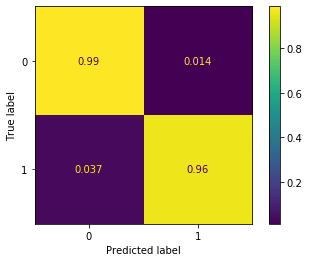

In [60]:
#PART B a).Draw the confusion matrix using plot_confusion_matrix from scikit-learn
fig, ax = plt.subplots(figsize=(6,4))
disp = plot_confusion_matrix(base_spam_classifier, test_spam_score, test_data.spam, normalize='true', ax=ax);

In [61]:
#PART B b). Calculate recall and precision scores.
print("precision score:", precision_score(test_data.spam, base_predicted, average='macro'))
print("recall score:   ", recall_score(test_data.spam, base_predicted, average='macro'))
print("f1 score:       ", f1_score(test_data.spam, base_predicted, average='macro'))

precision score: 0.975623530414645
recall score:    0.9744472789115646
f1 score:        0.9750329470736081


----ROC----RECEIVER---OPERATOR---CHARACTERSTIC----

When prob>threshold => return 1 else return 0.
Prob tresholds:
 [2.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 1.00000000e+000 1.00000000e+000 1.00000000e+000 9.99992336e-001
 9.99992323e-001 9.98329240e-001 9.98265537e-001 9.71333110e-001
 9.69931471e-001 9.39337019e-001 9.22071594e-001 6.43328048e-001
 6.17304073e-001 3.79856517e-001 3.58025681e-001 2.49705762e-001
 1.71478692e-001 1.52966761e-001 1.26585659e-001 6.06448975e-002
 5.77389141e-002 7.53574958e-006 7.03037451e-006 1.24542679e-012
 1.05988586e-012 9.46134283e-029 8.65004227e-029 3.72756772e-032
 2.50257063e-032 1.43279037e-322 0.00000000e+000]


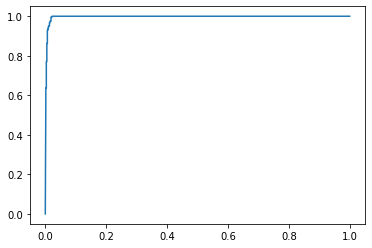

----AUC----AREA---UNDER---CURVE-------------------

0.996984835600907


In [62]:
#PART B c). Draw ROC curve and calculate AUC score using test set.
print("----ROC----RECEIVER---OPERATOR---CHARACTERSTIC----\n")
fpr, tpr, thresholds = roc_curve(test_data.spam, base_predicted_proba[:,1])
print("When prob>threshold => return 1 else return 0.")
print("Prob tresholds:\n",thresholds)
plt.plot(fpr,tpr)
plt.show()
print("----AUC----AREA---UNDER---CURVE-------------------\n")
print(roc_auc_score(test_data.spam, base_predicted_proba[:,1]))

In [63]:
#PART B d). What percentage of valid mails is spam?
#In other words we are looking for FPR, where positive means spam.
ham_mails_as_spam = np.count_nonzero(base_predicted[np.where(test_data.spam==0)]==1)
ham_mails = len(base_predicted[np.where(test_data.spam==0)])
print("Percentage of valid mails classified as spam (FPR): {0:.0%}".format(ham_mails_as_spam/ham_mails))

Percentage of valid mails classified as spam (FPR): 1%


In [64]:
#PART B e). Assuming that only mails classified as ham are put 
#in our mailbox what percentage of mail in our inbox is spam?
#In other words we are looking for FNR.
spam_mails_as_ham= np.count_nonzero(base_predicted[np.where(test_data.spam==1)]==0)
as_ham_mails = np.count_nonzero(base_predicted==0)

print("Percentage of valid mails classified as spam: {0:.0%}".format(spam_mails_as_ham/as_ham_mails))

Percentage of valid mails classified as spam: 2%


# PART: C

In [65]:
#PART C 
#Find ten most probable and least probable words for each class. 
n = 10 

def word(i):
    return vectorizer.get_feature_names()[i]

word = np.vectorize(word)
most_probable = np.argsort(base_spam_classifier.feature_log_prob_,axis=1)[:,-1:-n-1:-1]
most_probable_words = word(most_probable)
print("10 most probable words in spam 1 and ham 0:")
pd.DataFrame(most_probable_words, index =[0,1], columns=range(1,11))

10 most probable words in spam 1 and ham 0:


,1,2,3,4,5,6,7,8,9,10
0,ect,hou,subject,enron,2000,gas,deal,meter,hpl,cc
1,subject,com,http,company,font,td,www,00,information,statements


In [66]:
least_probable = np.argsort(base_spam_classifier.feature_log_prob_,axis=1)[:,:n]
least_probable_words = word(least_probable)
print("10 least probable words in spam 1 and ham 0:") 
pd.DataFrame(least_probable_words, index =[0,1], columns=range(1,11))

10 least probable words in spam 1 and ham 0:


,1,2,3,4,5,6,7,8,9,10
0,hyb,lunatics,lunary,lunar,lunacy,lumpish,lummox,luminosity,luminescent,luminance
1,replacement,loring,lorio,bolt,loses,bombeck,feeding,feedbacks,bonaire,sixth


# PART: D
#Check the classifier on the remaining datasets data/Enron_2-6. For each set calculate recall and precision.

In [67]:
data2 = load_files('enron_spam/data/Enron_2/', encoding='latin-1', shuffle=True, categories=['ham', 'spam'] )
data3 = load_files('enron_spam/data/Enron_3/', encoding='latin-1', shuffle=True, categories=['ham', 'spam'] )
data4 = load_files('enron_spam/data/Enron_4/', encoding='latin-1', shuffle=True, categories=['ham', 'spam'] )
data5 = load_files('enron_spam/data/Enron_5/', encoding='latin-1', shuffle=True, categories=['ham', 'spam'] )
data6 = load_files('enron_spam/data/Enron_6/', encoding='latin-1', shuffle=True, categories=['ham', 'spam'] )
print("DONE")

DONE


In [68]:
df2 = pd.DataFrame({'text': data2['data'], 'spam': data2['target']})
df3 = pd.DataFrame({'text': data3['data'], 'spam': data3['target']})
df4 = pd.DataFrame({'text': data4['data'], 'spam': data4['target']})
df5 = pd.DataFrame({'text': data5['data'], 'spam': data5['target']})
df6 = pd.DataFrame({'text': data6['data'], 'spam': data6['target']})

dfi=[df2, df3, df4, df5, df6]
print("DONE")

DONE


In [69]:
#PART B b). Calculate recall and precision scores.
for i in range(5):
    base_predicted_i = base_spam_classifier.predict(vectorizer.transform(dfi[i].text))
    print("precision score {}:".format(i+1), precision_score(dfi[i].spam, base_predicted_i, average='macro'))
    print("recall score    {}:".format(i+1), recall_score(dfi[i].spam, base_predicted_i, average='macro'))
    print("f1 score        {}:".format(i+1), f1_score(dfi[i].spam, base_predicted_i, average='macro'))

precision score 1: 0.9085812893699179
recall score    1: 0.9431016139354502
f1 score        1: 0.9236795613069015
precision score 2: 0.9500057060491564
recall score    2: 0.9710417315882414
f1 score        2: 0.9597455144719241
precision score 3: 0.9279634710758599
recall score    3: 0.9427719505418172
f1 score        3: 0.9350238614063258
precision score 4: 0.9408132735954624
recall score    4: 0.9680697278911565
f1 score        4: 0.9528214326511604
precision score 5: 0.9515917046161199
recall score    5: 0.9619444444444445
f1 score        5: 0.9566128652465617


# PART: E
#Combine all sets. Train a new classifier on the combined set, of course after dividing into test and train sets. Redo point B. using this classifier and combined test set. 

In [71]:
df1 = pd.DataFrame({'text': data1['data'], 'spam': data1['target']})
dframe=[df1, df2, df3, df4, df5, df6]
all_sets = pd.concat(dframe)
print("DONE")

DONE


In [72]:
seed = 57576
train_data_e, test_data_e = train_test_split(all_sets, train_size=0.8, test_size=0.2, stratify=all_sets['spam'], random_state = seed)


Leangth of the created vocabulary:
127621
precision score: 0.9855174863477401
recall score:    0.985555145572826
f1 score:        0.9855350954397932


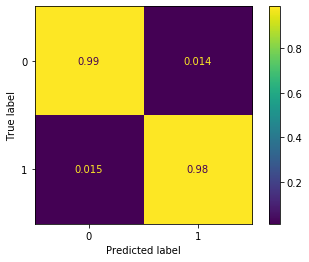

In [73]:
#Tokenization
vectorizer_e = CountVectorizer(stop_words='english')
train_spam_score_e = vectorizer_e.fit_transform(train_data_e.text)
test_spam_score_e = vectorizer_e.transform(test_data_e.text)

#Multinomial Bayes classification
base_spam_classifier_e = MultinomialNB()
base_spam_classifier_e.fit(train_spam_score_e, train_data_e.spam)

base_predicted_e = base_spam_classifier_e.predict(test_spam_score_e)
base_predicted_proba_e = base_spam_classifier_e.predict_proba(test_spam_score_e)

#Print vocabulaty size
print("\nLeangth of the created vocabulary:")
print(len(vectorizer_e.vocabulary_))

#------------------------------------------------------------------------------------#
#------------------------------------REDO B------------------------------------------#
#------------------------------------------------------------------------------------#

#PART E a).Draw the confusion matrix using plot_confusion_matrix from scikit-learn
fig_e, ax_e = plt.subplots(figsize=(6,4))
disp_e = plot_confusion_matrix(base_spam_classifier_e, test_spam_score_e, test_data_e.spam, normalize='true', ax=ax_e);

#PART E b). Calculate recall and precision scores.
print("precision score:", precision_score(test_data_e.spam, base_predicted_e, average='macro'))
print("recall score:   ", recall_score(test_data_e.spam, base_predicted_e, average='macro'))
print("f1 score:       ", f1_score(test_data_e.spam, base_predicted_e, average='macro'))

----ROC----RECEIVER---OPERATOR---CHARACTERSTIC----

When prob>threshold => return 1 else return 0.
Prob tresholds:
 [2.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 1.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 1.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 1.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 1.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 1.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 1.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 1.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 1.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 1.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 1.00000000e+000 1.00000000e+000 1.00000000e+000 9.99999999e-001
 9.99999999e-001 9.99999996e-001 9.99999996e-001 9.99999995e-001
 9.99999995e-001 9.99999991e-001 9.99999990e-001 9.99999978e-001
 9.99999977e-001 9.99999974e-001 9.9999

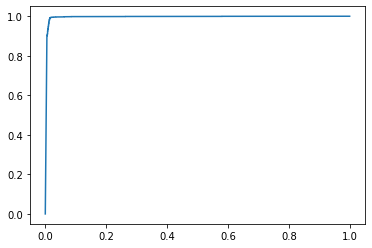

----AUC----AREA---UNDER---CURVE-------------------

0.9958662876244154
Percentage of valid mails classified as spam (FPR): 1%
Percentage of valid mails classified as spam: 2%


In [45]:
#PART E c). Draw ROC curve and calculate AUC score using test set.
print("----ROC----RECEIVER---OPERATOR---CHARACTERSTIC----\n")
fpr_e, tpr_e, thresholds_e = roc_curve(test_data_e.spam, base_predicted_proba_e[:,1])
print("When prob>threshold => return 1 else return 0.")
print("Prob tresholds:\n",thresholds_e)
plt.plot(fpr_e,tpr_e)
plt.show()
print("----AUC----AREA---UNDER---CURVE-------------------\n")
print(roc_auc_score(test_data_e.spam, base_predicted_proba_e[:,1]))

#PART E d). What percentage of valid mails is spam?
#In other words we are looking for FPR, where positive means spam.
ham_mails_as_spam_e = np.count_nonzero(base_predicted_e[np.where(test_data_e.spam==0)]==1)
ham_mails_e = len(base_predicted_e[np.where(test_data_e.spam==0)])
print("Percentage of valid mails classified as spam (FPR): {0:.0%}".format(ham_mails_as_spam_e/ham_mails_e))

#PART E e). Assuming that only mails classified as ham are put 
#in our mailbox what percentage of mail in our inbox is spam?
#In other words we are looking for FNR.
spam_mails_as_ham_e= np.count_nonzero(base_predicted_e[np.where(test_data_e.spam==1)]==0)
as_ham_mails_e = np.count_nonzero(base_predicted_e==0)

print("Percentage of valid mails classified as spam: {0:.0%}".format(spam_mails_as_ham_e/as_ham_mails_e))

# PART: F
#Assumimg that we want to keep the frequency 
#of misclassified ham mails below 5 per file,
#what would be the percentage of spam in our inbox?

In [ ]:
#6 plików po 5 misclassified czyli 30 
#